In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"data/app.csv", sep=";")
df = data.copy()
df.head(2)

,time,users,sessions,newusers,crashes
0,22.12.18 09:00,64,60,5,0
1,22.12.18 10:00,79,84,8,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      169 non-null    object
 1   users     169 non-null    int64 
 2   sessions  169 non-null    int64 
 3   newusers  169 non-null    int64 
 4   crashes   169 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.7+ KB


In [4]:
#convert time column to datetime
df["time"] = pd.to_datetime(data["time"])

In [5]:
#no missing values
df.isna().sum(axis=0)

time        0
users       0
sessions    0
newusers    0
crashes     0
dtype: int64

In [6]:
df = df.set_index("time").asfreq("H")

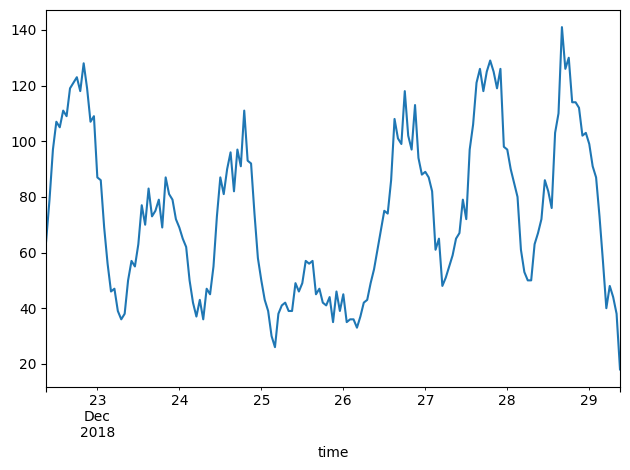

In [7]:
df["users"].plot()
plt.tight_layout()
plt.show()

In [8]:
df["hour"] = df.index.hour
df["weekday"] = df.index.weekday

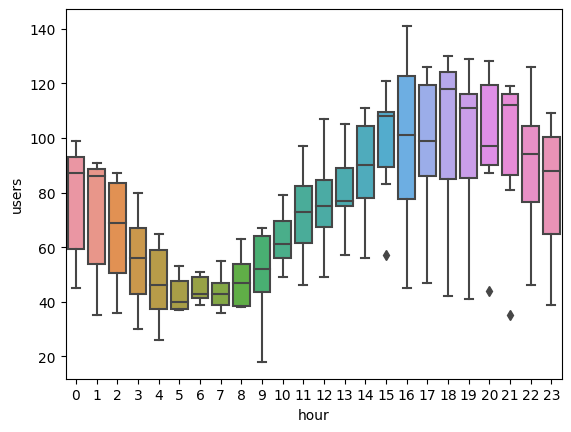

In [9]:
sns.boxplot(df, x="hour", y="users")
plt.show()

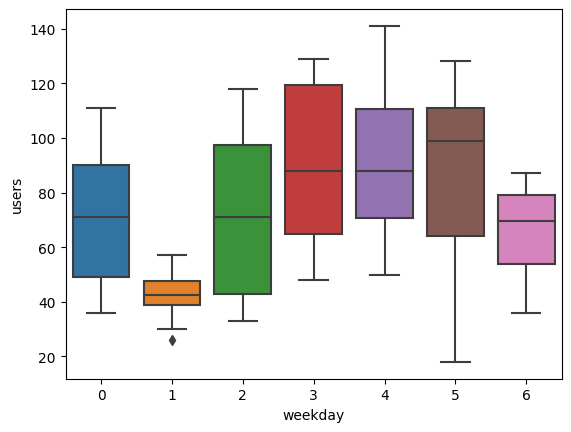

In [10]:
sns.boxplot(df, x="weekday", y="users")
plt.show()

In [11]:
df.corr()["users"][1:].sort_values(ascending=False)

sessions    0.955080
newusers    0.665614
hour        0.523463
weekday     0.243434
crashes     0.200727
Name: users, dtype: float64

In [12]:
np.unique(df.crashes)

array([0, 1, 2, 3, 4, 6])

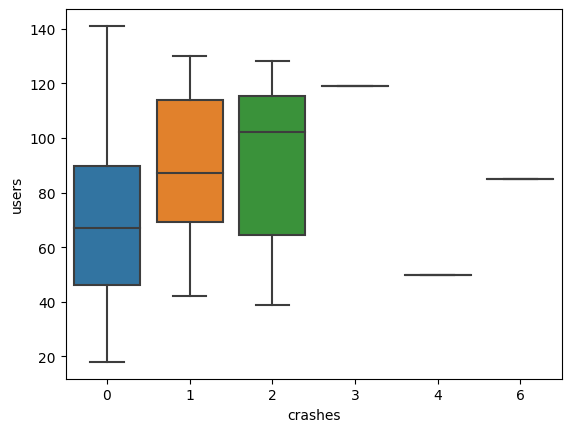

In [13]:
sns.boxplot(df, x="crashes", y="users")
plt.show()

In [14]:
df["crash_dummy"] = np.where(df["crashes"]>0,1,0)

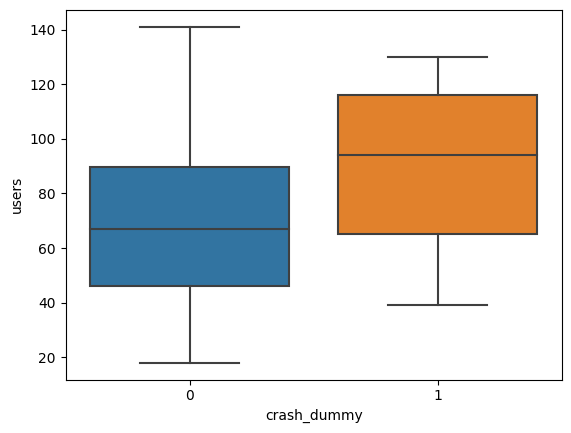

In [15]:
sns.boxplot(df, x="crash_dummy", y="users")
plt.show()

In [16]:
df.crash_dummy.sum()/df.shape[0]*100

20.710059171597635

- When crashes happened there were more users in the system, this is probably because higher number of users might be one of the reasons to why the system crashed.
- Also, we observe crashes in 20% of the total period, so it might be argued that the crashes are not a rare occasion.

In [17]:
df[df.weekday == 1]
#we observe a quite a serious drop in app usage on 25th of December, which is probably related to that being the Christmas Day.

,users,sessions,newusers,crashes,hour,weekday,crash_dummy
time,,,,,,,
2018-12-25 00:00:00,50,45,4,0,0,1,0
2018-12-25 01:00:00,43,43,6,0,1,1,0
2018-12-25 02:00:00,39,39,2,2,2,1,1
2018-12-25 03:00:00,30,23,3,0,3,1,0
2018-12-25 04:00:00,26,26,3,0,4,1,0
2018-12-25 05:00:00,38,37,2,0,5,1,0
2018-12-25 06:00:00,41,42,7,0,6,1,0
2018-12-25 07:00:00,42,38,5,0,7,1,0
2018-12-25 08:00:00,39,45,4,0,8,1,0


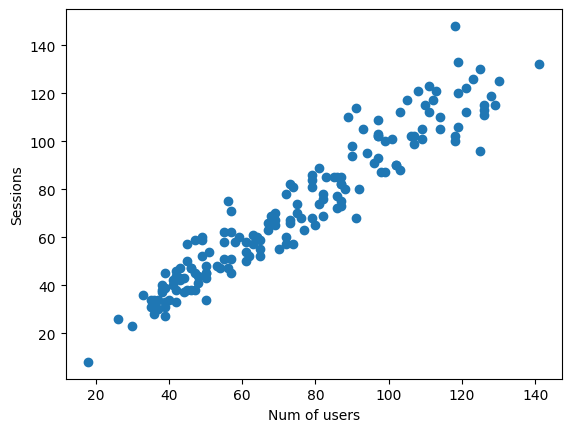

In [21]:
plt.scatter(x=df["users"], y=df["sessions"])
plt.xlabel("Num of users")
plt.ylabel("Sessions")
plt.show()

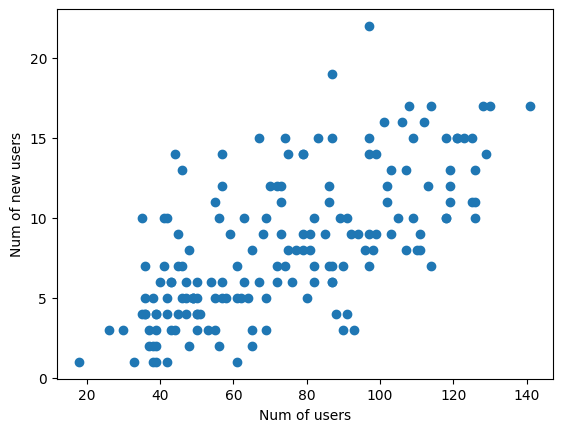

In [22]:
plt.scatter(x=df["users"], y=df["newusers"])
plt.xlabel("Num of users")
plt.ylabel("Num of new users")
plt.show()

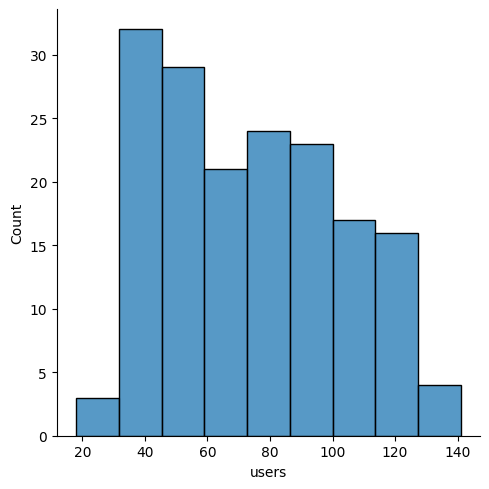

In [24]:
sns.displot(df["users"])